In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,dataset
from torchvision import transforms,datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
from PIL import Image
from IPython.display import display

In [4]:
path = 'P:\\tech\\datasets\\dat\\'

In [5]:
p = 'P:\\tech\\datasets\\dat\\test\\5\\00b11f87-98be-488b-a1de-2b10e6585936_5L.png'

In [6]:
im = Image.open(p)

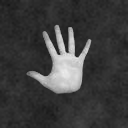

In [7]:
im

In [8]:
train_transform = transforms.Compose([
    
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.Grayscale(),
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor()
    
])

In [9]:
test_transform = transforms.Compose([
    
    transforms.Grayscale(),
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor()
    
])

In [10]:
train_data = datasets.ImageFolder(root=path + "train",transform=train_transform)
test_data = datasets.ImageFolder(root=path + "test",transform=test_transform)

In [11]:
print(train_data.class_to_idx)
print(test_data.class_to_idx)

{'0': 0, '5': 1}
{'0': 0, '5': 1}


In [12]:
print(len(train_data),len(test_data))

1275 81


In [13]:
torch.manual_seed(59)
train_loader = DataLoader(train_data,batch_size = 30 ,shuffle = True)
test_loader = DataLoader(test_data,batch_size = 81,shuffle = False)

In [14]:
class convnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1) ##(((224-2)/1)-1)/2
        self.conv2 = nn.Conv2d(6,16,3,1) ##((((224-2)-1)/2-2)-1)/2
        self.fc1 = nn.Linear(30*30*16,120)
        self.fc2 = nn.Linear(120,32)
        self.fc3 = nn.Linear(32,2)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,30*30*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.fc3(x),dim = 1)

In [15]:
model = convnet()
model.cuda()

convnet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=14400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
)

In [16]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [17]:
import time

start_time = time.time()
epochs = 3
train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(epochs):
    trn_acc = 0
    tst_acc = 0
    for b,(x_train,y_train) in enumerate(train_loader): 
        b += 1
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        
        y_pred = model.forward(x_train)
        loss = criterion(y_pred,y_train)
        
        pred = torch.max(y_pred,1)[1]
        trn_acc += (pred == y_train).sum()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print(b)
        if b%20 == 0:
            print(f"loss in epoch&bacth-->{epoch}:{b} is {loss}")
            
    train_loss.append(loss)   
    train_acc.append(trn_acc)
    
    with torch.no_grad():
        for bt,(x_test,y_test) in enumerate(test_loader):
            
            bt += 1
            x_test = x_test.cuda()
            y_test = y_test.cuda()
            
            y_val = model.forward(x_test)
            predicted = torch.max(y_val.data, 1)[1] 
            tst_acc += (predicted == y_test).sum()
            loss = criterion(y_val,y_test)
            
            if bt%1 == 0:
                print(f"test_loss in epoch&b-->{epoch}:{b} is {loss}")
            
            test_loss.append(loss)      
        
    test_acc.append(tst_acc)



print(f"total time taken is {(start_time - time.time())/60}")

loss in epoch&bacth-->0:20 is 0.6977351903915405
loss in epoch&bacth-->0:40 is 0.6046898365020752
test_loss in epoch&b-->0:43 is 0.6432363986968994
loss in epoch&bacth-->1:20 is 0.3023011088371277
loss in epoch&bacth-->1:40 is 0.12184621393680573
test_loss in epoch&b-->1:43 is 0.24769015610218048
loss in epoch&bacth-->2:20 is 0.024280471727252007
loss in epoch&bacth-->2:40 is 0.007290168199688196
test_loss in epoch&b-->2:43 is 0.0021756822243332863
total time taken is -1.0281847556432089


In [18]:
b

43

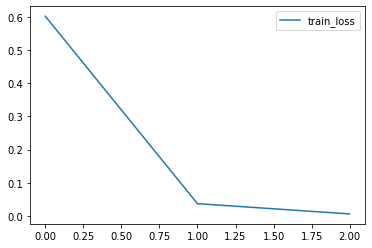

In [19]:
plt.plot(train_loss,label = "train_loss")
#plt.plot(test_loss,label = "test_loss")
plt.legend()
plt.show()

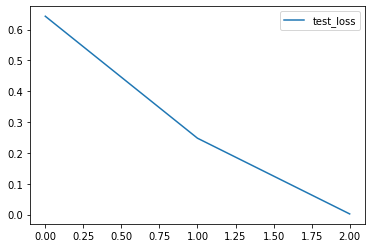

In [20]:
plt.plot(test_loss,label = "test_loss")
plt.legend()
plt.show()

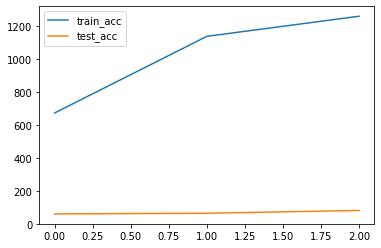

In [21]:
plt.plot(train_acc,label = "train_acc")
plt.plot(test_acc,label = "test_acc")
plt.legend()
plt.show()

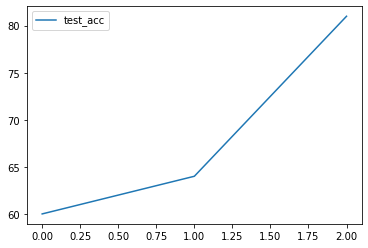

In [22]:
plt.plot(test_acc,label = "test_acc")
plt.legend()
plt.show()

In [29]:
PATH = 'V:\\projects\\servo\\fingerServo.pt'

In [30]:
torch.save(model.state_dict(), PATH)

In [25]:
torch.cuda.empty_cache()

In [26]:
(((224-2)/1)-1)/2

110.5

In [27]:
((((128-2)-1)/2-2)-1)/2

29.75

In [28]:
test_acc[-1]

tensor(81, device='cuda:0')